In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import importlib.util
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    
from data_handle.data_load import ForexDataLoad
from data_handle.quick_look import ForexQuickLook
from data_handle.data_clean import ForexDataClean

from features.indicators import (
    ForexMomentumIndicators, 
    ForexTrendIndicators, 
    ForexVolumeIndicators, 
    ForexVolatilityIndicators
    )

from features.tsfresh_extractor import ForexTSFeatures

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = ForexDataLoad(file_path = '../data/xauaud.csv').data

FOREX DATA LOADER
 Available Fuctions 
1 load_csv 
2 load_dataframe 
3 load_from_database
Data loaded successfully!
Shape: (38217, 5)



FOREX QUICK LOOK
 Available Fuctions 
1 display_info 
2 check_missing_values_and_duplicates 
3 plot_candlestick 
4 plot_time_series 
5 get_summary
DATASET INFORMATION

1. BASIC INFO:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2025-09-03 19:00:00 to 2025-09-05 20:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    48 non-null     float64
 1   high    48 non-null     float64
 2   low     48 non-null     float64
 3   close   48 non-null     float64
 4   volume  48 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.2 KB
None

2. FIRST 3 ROWS:
                        open     high      low    close  volume
datetime                                                       
2025-09-03 19:00:00  5441.48  5452.88  5439.54  5452.58       0
2025-09-03 20:00:00  5452.56  5462.86  5447.80  5461.05       0
2025-09-03 21:00:00  5461.05  5465.36  5446.87  5454.38       0

3. LAST 3 ROWS:
        

<Figure size 1500x600 with 0 Axes>

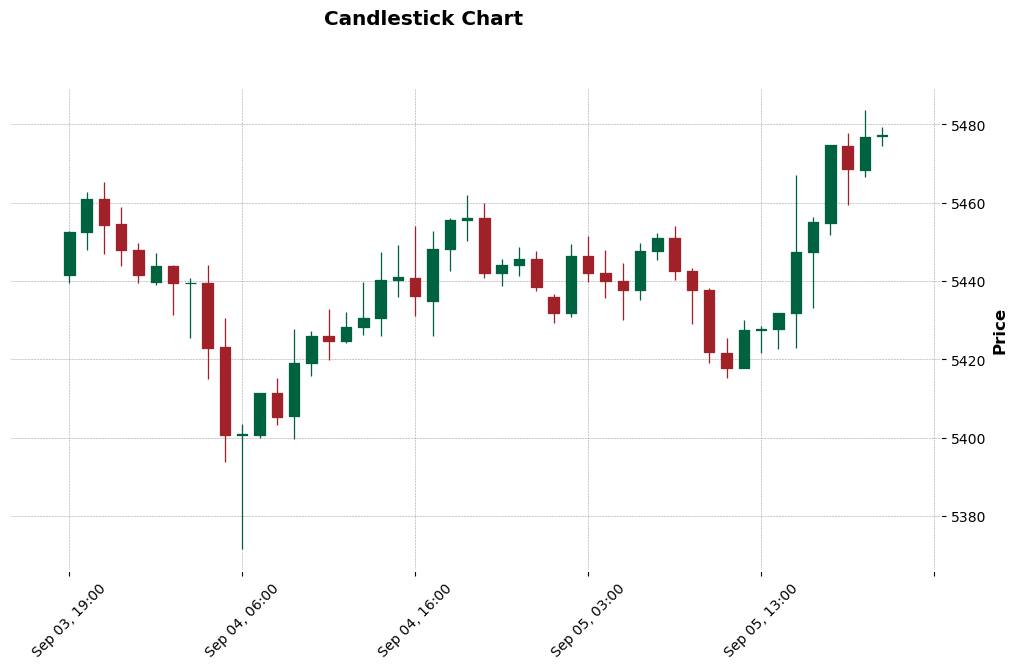

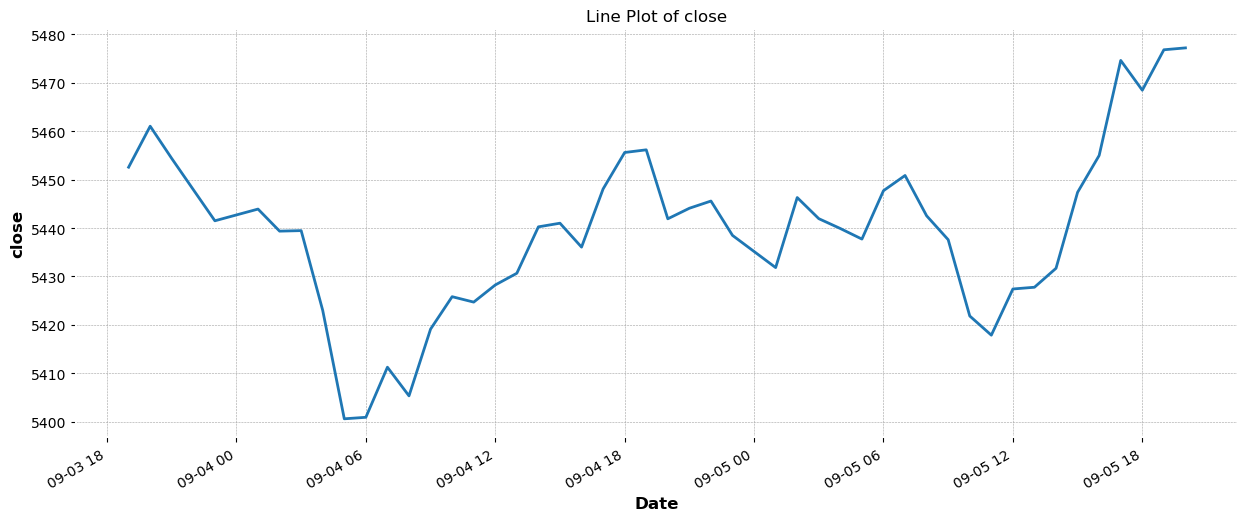

DATASET SUMMARY
Total Rows: 48
Total Columns: 5
Date Range: 2025-09-03 19:00:00 to 2025-09-05 20:00:00
Numeric Columns: ['open', 'high', 'low', 'close', 'volume']
Non Numeric Columns: []
Missing Values: 0
Duplicates: 0
Columns: Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')
Index Column: datetime


In [3]:
quick_look = ForexQuickLook( data = df, full_look = True, periods = 48)

In [4]:
cleaner = ForexDataClean(data = df, fast_clean = True)
df = cleaner.data

FOREX DATA CLEANER
 Available Fuctions 
1 remove_duplicates 
2 handle_missing_values 
3 validate_ohlc_integrity 
4 handle_outliers
Keep = first and subset = None
Removed 0 duplicate entries
Found 1 missing values
 dropped: 1 missing values .
OUTLIER DETECTION AND HANDLING
Method: quantile, Strategy: cap, Threshold: 3.0
Remove outliers: False
--------------------------------------------------
open: Found 766 outliers (383 low, 383 high)
Bounds: [1817.81300 - 5218.90300]
Original range: [1674.10000 - 5476.98000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

high: Found 764 outliers (381 low, 383 high)
Bounds: [1819.15000 - 5224.87300]
Original range: [1676.91000 - 5483.78000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

low: Found 766 outliers (383 low, 383 high)
Bounds: [1816.29450 - 5211.65900]
Original range: [1671.60000 - 5474.51000]
Method: Quantile (1%-99%)
Outliers detected but not removed (remove=False)

close: Found 76

In [5]:
trends = ForexTrendIndicators(data = df).get_all_trend_indicators()
trends.dropna()


TREND INDICATORS
 Available Fuctions: 
1 add_sma 
2 add_ema 
3 add_macd 
4 add_adx 
5 add_parabolic_sar 
6 add_trend_confirmation


open     high      low    close  volume     sma_20  \
datetime                                                                     
2019-03-25 08:00:00  1858.30  1859.15  1858.02  1858.37       0  1853.9015   
2019-03-25 09:00:00  1858.37  1859.40  1857.13  1857.96       0  1854.2200   
2019-03-25 10:00:00  1857.96  1860.14  1856.84  1858.41       0  1854.6340   
2019-03-25 11:00:00  1858.41  1858.52  1856.21  1858.28       0  1854.9475   
2019-03-25 12:00:00  1858.28  1858.31  1856.01  1857.53       0  1855.4010   
...                      ...      ...      ...      ...     ...        ...   
2025-09-05 16:00:00  5447.51  5456.26  5433.22  5455.01       0  5438.7805   
2025-09-05 17:00:00  5454.84  5474.80  5451.73  5474.64       0  5440.4165   
2025-09-05 18:00:00  5474.54  5477.82  5459.37  5468.49       0  5441.6360   
2025-09-05 19:00:00  5468.33  5483.78  5466.57  5476.84       0  5443.1985   
2025-09-05 20:00:00  5476.98  5479.45  5474.51  5477.23       0  5445.1355   

                     sma_20_slope     sma_50  sma_50_slope    sma_100  ...  \
datetime                                                               ...   
2019-03-25 08:00:00        0.4785  1847.5000        0.3598  1769.9229  ...   
2019-03-25 09:00:00        0.3185  1847.8336        0.3336  1771.6112  ...   
2019-03-25 10:00:00        0.4140  1848.1106        0.2770  1773.3185  ...   
2019-03-25 11:00:00        0.3135  1848.3650        0.2544  1775.0177  ...   
2019-03-25 12:00:00        0.4535  1848.6364        0.2714  1776.7224  ...   
...                           ...        ...           ...        ...  ...   
2025-09-05 16:00:00       -0.0580  5435.8618        0.8922  5396.5852  ...   
2025-09-05 17:00:00        1.6360  5436.9340        1.0722  5398.2257  ...   
2025-09-05 18:00:00        1.2195  5437.7528        0.8188  5399.7764  ...   
2025-09-05 19:00:00        1.5625  5438.7294        0.9766  5401.3810  ...   
2025-09-05 20:00:00        1.9370  5439.5710        0.8416  5403.0392  ...   

                          ema_26       ema_50  ema_50_slope  macd_line  \
datetime                                                                 
2019-03-25 08:00:00  1849.793784  1829.400748      1.182418   5.981808   
2019-03-25 09:00:00  1850.398689  1830.520718      1.119971   5.712965   
2019-03-25 10:00:00  1850.992120  1831.614416      1.093697   5.473127   
2019-03-25 11:00:00  1851.531963  1832.660125      1.045709   5.212477   
2019-03-25 12:00:00  1851.976262  1833.635414      0.975289   4.889033   
...                          ...          ...           ...        ...   
2025-09-05 16:00:00  5436.716585  5427.020285      1.142437   1.618773   
2025-09-05 17:00:00  5439.525727  5428.887725      1.867440   4.394961   
2025-09-05 18:00:00  5441.671228  5430.440755      1.553030   6.029353   
2025-09-05 19:00:00  5444.276323  5432.260333      1.819578   7.907246   
2025-09-05 20:00:00  5446.717336  5434.023850      1.763516   9.319530   

                     macd_signal  macd_histogram        adx    plus_di  \
datetime                                                                 
2019-03-25 08:00:00     6.945520       -0.963712  51.807123  30.161342   
2019-03-25 09:00:00     6.699009       -0.986043  51.521892  28.686054   
2019-03-25 10:00:00     6.453833       -0.980706  51.414961  28.240650   
2019-03-25 11:00:00     6.205561       -0.993085  50.914978  26.803418   
2019-03-25 12:00:00     5.942256       -1.053223  50.320507  25.416446   
...                          ...             ...        ...        ...   
2025-09-05 16:00:00     1.085136        0.533637  15.971064  26.705218   
2025-09-05 17:00:00     1.747101        2.647860  17.384413  32.077099   
2025-09-05 18:00:00     2.603551        3.425802  18.829879  30.830188   
2025-09-05 19:00:00     3.664290        4.242956  20.430768  31.110880   
2025-09-05 20:00:00     4.795338        4.524192  21.917309  30.416511   

                      minus_di  parabolic_sar  
datetime            

In [6]:
ts_features = ForexTSFeatures(data = trends.tail(2400), target_column = 'close' )

TSFRESH FEATURE ENGINEERING
 Available Functions: 
1 prepare_ts_data 
2 extract_ts_features 
3 select_relevant_features 
4 get_feature_importance 
5 get_train_test_split 
6 get_all_features


In [7]:
#ts_features.prepare_ts_data()

In [8]:
#ts_features.extract_ts_features()

In [9]:
#ts_features.select_relevant_features()

In [10]:
#ts_features.get_feature_importance()

In [11]:
#ts_features.check_leakage()

In [12]:
X_train, X_test, y_train, y_test = ts_features.get_all_features()

Rolling: 100%|██████████| 20/20 [00:08<00:00,  2.35it/s]


Using comprehensive feature settings


Feature Extraction: 100%|██████████| 20/20 [12:33<00:00, 37.65s/it]


Selecting relevant features...
Aligned data: 2390 samples
Target range: 4867.4900 to 5461.0500
X index: [Timestamp('2025-04-10 13:00:00'), Timestamp('2025-04-10 14:00:00'), Timestamp('2025-04-10 15:00:00'), Timestamp('2025-04-10 16:00:00'), Timestamp('2025-04-10 17:00:00')]
y index: [Timestamp('2025-04-10 13:00:00'), Timestamp('2025-04-10 14:00:00'), Timestamp('2025-04-10 15:00:00'), Timestamp('2025-04-10 16:00:00'), Timestamp('2025-04-10 17:00:00')]
Indices match: True
Selected 5210 relevant features
 Top feature correlations:
   1. tsfresh_low__c3__lag_1: 0.9201 (+)
   2. tsfresh_low__root_mean_square: 0.9199 (+)
   3. tsfresh_low__mean: 0.9199 (+)
   4. tsfresh_low__c3__lag_2: 0.9196 (+)
   5. tsfresh_low__c3__lag_3: 0.9189 (+)
   6. tsfresh_high__mean: 0.9162 (+)
   7. tsfresh_high__root_mean_square: 0.9162 (+)
   8. tsfresh_low__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"mean": 0.9162 (+)
   9. tsfresh_open__mean: 0.9158 (+)
  10. tsfresh_open__root_mean_square: 0.91

In [14]:
X_train.head(50)

tsfresh_ema_12__c3__lag_1  \
2025-04-10 13:00:00                  -1.187127   
2025-04-10 14:00:00                  -1.156957   
2025-04-10 15:00:00                  -1.124796   
2025-04-10 16:00:00                  -1.088577   
2025-04-10 17:00:00                  -1.049299   
2025-04-10 18:00:00                  -1.007488   
2025-04-10 19:00:00                  -0.964988   
2025-04-10 20:00:00                  -0.920974   
2025-04-10 21:00:00                  -0.876376   
2025-04-10 22:00:00                  -0.832029   
2025-04-10 23:00:00                  -0.789297   
2025-04-11 01:00:00                  -0.747764   
2025-04-11 02:00:00                  -0.706882   
2025-04-11 03:00:00                  -0.667173   
2025-04-11 04:00:00                  -0.629570   
2025-04-11 05:00:00                  -0.594457   
2025-04-11 06:00:00                  -0.561347   
2025-04-11 07:00:00                  -0.529249   
2025-04-11 08:00:00                  -0.497548   
2025-04-11 09:00:00                  -0.466852   
2025-04-11 10:00:00                  -0.437844   
2025-04-11 11:00:00                  -0.411463   
2025-04-11 12:00:00                  -0.387838   
2025-04-11 13:00:00                  -0.366904   
2025-04-11 14:00:00                  -0.348748   
2025-04-11 15:00:00                  -0.333309   
2025-04-11 16:00:00                  -0.320646   
2025-04-11 17:00:00                  -0.309830   
2025-04-11 18:00:00                  -0.300287   
2025-04-11 19:00:00                  -0.291392   
2025-04-11 20:00:00                  -0.283500   
2025-04-11 21:00:00                  -0.276395   
2025-04-11 22:00:00                  -0.270630   
2025-04-11 23:00:00                  -0.266363   
2025-04-14 01:00:00                  -0.264005   
2025-04-14 02:00:00                  -0.263263   
2025-04-14 03:00:00                  -0.264042   
2025-04-14 04:00:00                  -0.265773   
2025-04-14 05:00:00                  -0.268336   
2025-04-14 06:00:00                  -0.271489   
2025-04-14 07:00:00                  -0.275581   
2025-04-14 08:00:00                  -0.259548   
2025-04-14 09:00:00                  -0.244666   
2025-04-14 10:00:00                  -0.230625   
2025-04-14 11:00:00                  -0.218154   
2025-04-14 12:00:00                  -0.208086   
2025-04-14 13:00:00                  -0.200679   
2025-04-14 14:00:00                  -0.195072   
2025-04-14 15:00:00                  -0.190817   
2025-04-14 16:00:00                  -0.187952   

                     tsfresh_ema_50__quantile__q_0.3  \
2025-04-10 13:00:00                        -1.469493   
2025-04-10 14:00:00                        -1.466411   
2025-04-10 15:00:00                        -1.463329   
2025-04-10 16:00:00                        -1.460247   
2025-04-10 17:00:00                        -1.450824   
2025-04-10 18:00:00                        -1.438229   
2025-04-10 19:00:00                        -1.425635   
2025-04-10 20:00:00                        -1.413493   
2025-04-10 21:00:00                        -1.402257   
2025-04-10 22:00:00                        -1.391021   
2025-04-10 23:00:00                        -1.379784   
2025-04-11 01:00:00                        -1.371634   
2025-04-11 02:00:00                        -1.363484   
2025-04-11 03:00:00                        -1.355333   
2025-04-11 04:00:00                        -1.346235   
2025-04-11 05:00:00                        -1.336662   
2025-04-11 06:00:00                        -1.327089   
2025-04-11 07:00:00                        -1.317268   
2025-04-11 08:00:00                        -1.306951   
2025-04-11 09:00:00                        -1.296633   
2025-04-11 10:00:00                        -1.286315   
2025-04-11 11:00:00                        -1.275692   
2025-04-11 12:00:00                        -1.265070   
2025-04-11 13:00:00                        -1.254447   
2025-04-11 14:00:00                        -1.241706   
2025-04-11 15:

In [19]:
y_train.head(50)

2025-04-10 13:00:00    5046.95
2025-04-10 14:00:00    5050.97
2025-04-10 15:00:00    5050.30
2025-04-10 16:00:00    5037.34
2025-04-10 17:00:00    5050.20
2025-04-10 18:00:00    5099.47
2025-04-10 19:00:00    5095.05
2025-04-10 20:00:00    5081.52
2025-04-10 21:00:00    5090.43
2025-04-10 22:00:00    5096.16
2025-04-10 23:00:00    5099.79
2025-04-11 01:00:00    5118.17
2025-04-11 02:00:00    5123.48
2025-04-11 03:00:00    5156.82
2025-04-11 04:00:00    5139.51
2025-04-11 05:00:00    5148.07
2025-04-11 06:00:00    5153.21
2025-04-11 07:00:00    5177.97
2025-04-11 08:00:00    5154.90
2025-04-11 09:00:00    5155.27
2025-04-11 10:00:00    5160.15
2025-04-11 11:00:00    5170.85
2025-04-11 12:00:00    5177.55
2025-04-11 13:00:00    5156.45
2025-04-11 14:00:00    5149.72
2025-04-11 15:00:00    5163.75
2025-04-11 16:00:00    5165.50
2025-04-11 17:00:00    5179.02
2025-04-11 18:00:00    5189.06
2025-04-11 19:00:00    5152.53
2025-04-11 20:00:00    5156.79
2025-04-11 21:00:00    5148.94
2025-04-